In [51]:
# Import necessary libraries

import pandas as pd
import requests
import zipfile
import io

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
## === Download and import the Data Science Job Salary dataset.===

# URL of the ZIP (raw)
url = "https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/Week%204%20-%20Data%20Understanding/W4D5%20-%20Mini%20project/Data%20Science%20Job%20Salaries.zip"

# Download the ZIP file
r = requests.get(url)
r.raise_for_status()

# Open ZIP from memory
zip_file = zipfile.ZipFile(io.BytesIO(r.content))

# List files within the ZIP
print("Files in zip:", zip_file.namelist())

# Read the CSV file inside the ZIP
csv_file_name = zip_file.namelist()[0]  # 1° file
df = pd.read_csv(zip_file.open(csv_file_name))

# Check the first few rows
print(df.head())


Files in zip: ['ds_salaries.csv']
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP            

In [53]:
# shape - how big is the data?
print(f'Size: {df.shape[0]} rows x  {df.shape[1]} columns')

Size: 607 rows x  12 columns


In [54]:
# The first column is assigned the name "id".
df.rename(columns={df.columns[0]: 'id'}, inplace=True)

In [55]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None


In [56]:
# Transformation to more appropriate data types.

#Convert 'id' and 'work_year' to category type (they are not int, they are not used for mathematical calculations)
df['id'] = df['id'].astype('category')
df['work_year'] = df['work_year'].astype('category')

#Convert 'job_title' to string type (for descriptions)
df['job_title'] = df['job_title'].astype('string')

#We transform the remaining objects into categorical types, so that they take up less memory
df['experience_level'] = df['experience_level'].astype('category')
df['employment_type'] = df['employment_type'].astype('category')
df['salary_currency'] = df['salary_currency'].astype('category')
df['employee_residence'] = df['employee_residence'].astype('category')
df['company_location'] = df['company_location'].astype('category')
df['company_size'] = df['company_size'].astype('category')

# Check
print(df.dtypes)


id                          category
work_year                   category
experience_level            category
employment_type             category
job_title             string[python]
salary                         int64
salary_currency             category
salary_in_usd                  int64
employee_residence          category
remote_ratio                   int64
company_location            category
company_size                category
dtype: object


In [57]:
#== Identify and differentiate between quantitative and qualitative data within the dataset.==

quantitative = df.select_dtypes(include='number').columns
qualitative = df.select_dtypes(exclude='number').columns

print("Quantitative columns:", quantitative)
print("Qualitative columns:", qualitative)

Quantitative columns: Index(['salary', 'salary_in_usd', 'remote_ratio'], dtype='object')
Qualitative columns: Index(['id', 'work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_currency', 'employee_residence', 'company_location',
       'company_size'],
      dtype='object')


In [58]:
# == Preprocess the data by handling missing values and removing duplicates if needed. ==

# == Count duplicates==
print(f'\nDuplicate rows: {df.duplicated().sum()}')

# There are no duplicate records in the dataframe


Duplicate rows: 0


In [59]:
#== Handle missing values==
print(df.isnull().sum())

#There are no missing values ​​in the dataframe

id                    0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [60]:
# describe() - statistics for numeric columns
df.describe()


,salary,salary_in_usd,remote_ratio
count,6.070000e+02,607.000000,607.00000
mean,3.240001e+05,112297.869852,70.92257
std,1.544357e+06,70957.259411,40.70913
min,4.000000e+03,2859.000000,0.00000
25%,7.000000e+04,62726.000000,50.00000
50%,1.150000e+05,101570.000000,100.00000
75%,1.650000e+05,150000.000000,100.00000
max,3.040000e+07,600000.000000,100.00000


In [61]:
# == group-wise analysis of the experience_level column, calculating the mean and median salaries for each group ==

salary_in_usd_stats = df.groupby("experience_level")["salary_in_usd"].agg(["mean", "median"])

salary_in_usd_stats_formatted = salary_in_usd_stats.applymap(lambda x: f"${x:,.2f}")

print("\nMean and Median salary in USD by experience level:\n")
print(salary_in_usd_stats_formatted)
print()
print('Becoming a senior is the real salary turning point.')


Mean and Median salary in USD by experience level:

                         mean       median
experience_level                          
EN                 $61,643.32   $56,500.00
EX                $199,392.04  $171,437.50
MI                 $87,996.06   $76,940.00
SE                $138,617.29  $135,500.00

Becoming a senior is the real salary turning point.


/tmp/ipython-input-1291254742.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_in_usd_stats = df.groupby("experience_level")["salary_in_usd"].agg(["mean", "median"])
/tmp/ipython-input-1291254742.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  salary_in_usd_stats_formatted = salary_in_usd_stats.applymap(lambda x: f"${x:,.2f}")


/tmp/ipython-input-2046301789.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('experience_level')['salary_in_usd']


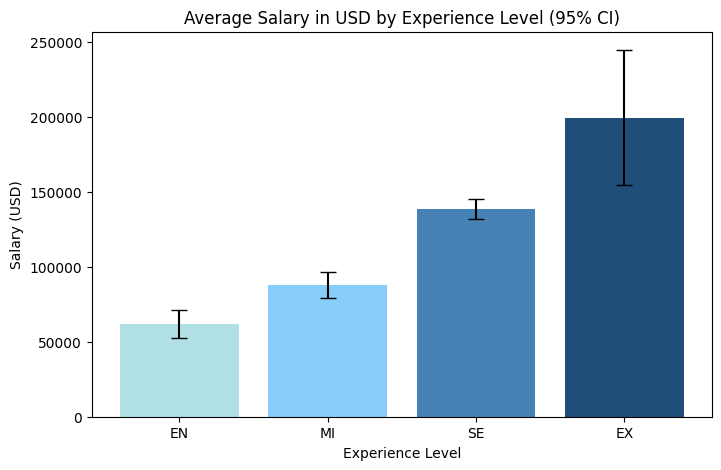

There is a clear positive relationship between experience level and average salary.
Senior and executive roles significantly outperform entry and mid-level positions.
Variability increases within Executives, likely due to a smaller sample size (n = 26) or to highly personalized compensation packages (bonuses, stock options, etc.).
Other levels have more predictable salaries.


In [62]:
# == Create a bar chart of average salary by experience level (with Matplotlib)==

# EN → Entry-level (junior/beginner) <   MI → Mid-level (intermediate)  <   SE → Senior-level (advanced)   <   EX → Executive-level (expert/leader/management)

#seguir aca

# Define the order of experience levels
level_order = ['EN', 'MI', 'SE', 'EX']
df['experience_level'] = pd.Categorical(df['experience_level'],
   categories=level_order,
   ordered=True
 )

grouped = df.groupby('experience_level')['salary_in_usd']
mean_salary = grouped.mean()
std_salary = grouped.std()
n = grouped.count()

sem = std_salary / np.sqrt(n)  # Standard error
ci95 = 1.96 * sem  # 95% CI

colors = ['#B0E0E6', '#87CEFA', '#4682B4', '#1F4E79']

plt.figure(figsize=(8,5))

plt.bar(
    mean_salary.index,
    mean_salary.values,
    yerr=ci95.values,
    capsize=6,
    color=colors
)

plt.title('Average Salary in USD by Experience Level (95% CI)')
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")

plt.show()

print ('There is a clear positive relationship between experience level and average salary.')
print('Senior and executive roles significantly outperform entry and mid-level positions.')
print('Variability increases within Executives, likely due to a smaller sample size (n = 26) or to highly personalized compensation packages (bonuses, stock options, etc.).')
print('Other levels have more predictable salaries.')


In [63]:
df['experience_level'].value_counts()

,count
experience_level,
SE,280
MI,213
EN,88
EX,26
